# Predictive Maintenance

Predictive maintenance allows equipment users and manufactures to assess the working condition of machinery, diagnose faults, or estimate when the next equiment failure is likely to occur. When you can diagnose or predict failures, you can plan maintenance in advance, better manage inventory, reduce downtime, and increase opreational efficiency.
You must take many factors into consideration, including:
- **The observed sources of faults and their relative frequency**.
- **Availability of process measurments through sensors**. The number, type and location of sensors, and their reliability and redundancies all affect both algorithm development and cost.
- **How various sources of faults translate to observed symptoms**. Such cause-effect analysis can require extensive processing of data from the available sensors.
- **Physical knowledge about the system dynamics**. This knowledge might come from mathematical modeling of the system and its faults and from the insights of domain experts.
- **The ultimate maintenance goal, such as fault recovery or development of a maintenance schedule**

## Some of the problems can solve
- Remaining useful life (RUL): dự đoán RUL cung cấp chi tiết về thông tin thời điểm máy sẽ bị hỏng, để có thể lên lịch bảo trì trước
- Flagging irregular behavior - gắn cờ hành vi bất thường: Anomaly detection through time series analysis - Phát hiện hành vi bất thường thông qua phân tích chuỗi thời gian 
- Failure diagnosis and recommendation of mitigation or maintenance actions after failure - chẩn đoán lỗi và đề xuất các hành động giảm thiểu hoặc bảo trì sau khi hỏng

## Algorithms for **Condition Monitoring** and **Prognostics**
**A predictive maintenance program use condition monitoring and prognostic** to analyze data measured from the system in the operation.
- **Condition monitoring** use data from a machine to assess its current condition and to detect and diagnose faults in the machine. A condition-monitoring algorithm can perform fault detection or diagnosis by comparing new data against the established markers of faulty conditions. Thus a codition-monitoring algorithm can perform fault detection or diagnosis by comparing new data against the established markers of faulty conditions.
- **Prognostics** is forecasting when a failure will happen based on the current and past sate of the machine. A prognostics algorithm typically estimates the machine's ***remaining useful life*** (RUL) or time-to-failure by analying the current sate of the machine. Prognostics can use modeling, machine learning, or a combination of both future values of condition indicatiors. These future values are then used to compute RUL metrics, which determince if and when maintenance should be performed.

A predictive maintenance system implements prognostics and condition monitoring algorithms with other IT infrastructure that makes the end results of the algorithm accessible and actionable to end users who perform the actual maintenance tasks. Predictive Maintenance Toolbox Provides tools to help you design such algorithms.

## Designing Algorithms for Condition Monitoring and Predictive Maintenance
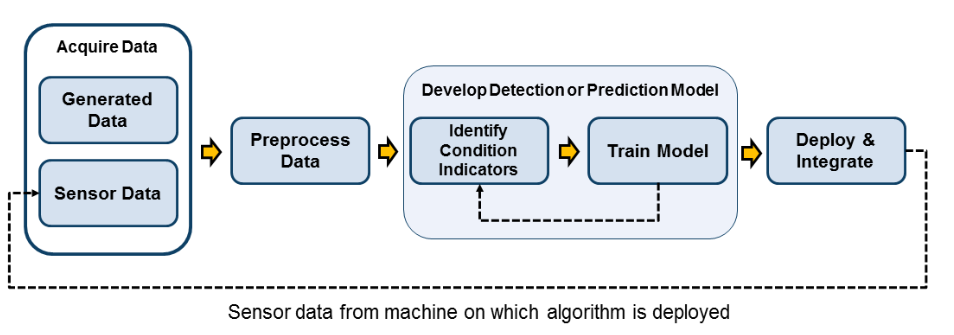
Beginning with data that describes your system in a range of healthy and faulty conditions, you develop a detection model (for condition monitoring) or a prediction model (for prognostics). Developing such a model requires identifying appropriate condition indicators and training a model to interpret them. That process is very to be iterativem as you try different condition indicators and different condition indicators and different models until you find the best model for your application. Finally, you deploy the algorithm and integrate it into your systems for machine monitoring and maintenance.

## Acquire Data
You might have access to one or more of the foloowing types of data:
- Read data from normal system operation
- Read data from system operating in a faulty condition
- Read data from system failures (run-to-failure data)

### Preproces Data
Data preprocessing is often necessary to convert the data in to a form from which condition indicators are easily extracted. Data preprocessing includes simple techniques such as outlier and missing value removal, and advanced signal processing techniques such as short-time Fourier transforms and transforms and transformations to the order domain.

Understanding your machine and the kind of data you have can help determine what preprocessing methods to use.

### Identify condition Indicators 
A key step in predictive mantenance algorithm development is idntifying condition indicators, features in your system data whose behavior changes in a predictable way as the system degrades. A condition indicator can be any feature that is useful for distinguishing normal from faulty operation or for predicting remaining useful life. A useful condition indicator clusters similar system status together, and sets different status apart. Examples of condition indicators include quantities derived from:
- Simple analysis, such as the mean value of the data over time.
- More complex signal analysis, such as the frequency of the peak magnitude in a signal spectrum, or a statistical moment describing changes in the spectrum over time.
- Model-based analysis of the data, such as the maximum eigenvalue of a state space model which has been estimated using the data.
- Conbination of multiple features into a sigle effective condition indicator (fusion).

## Train Detection or Prediction model
At the heart of the predictive maintenance algorithm is the detection or prediction model. This model analyzes extracted condition indicators to determine the current condition of the system (fault detection and diagnosis) or predict its future condition (remaining useful life prediction).

# RUL Esitmation using RUL Estimator Models
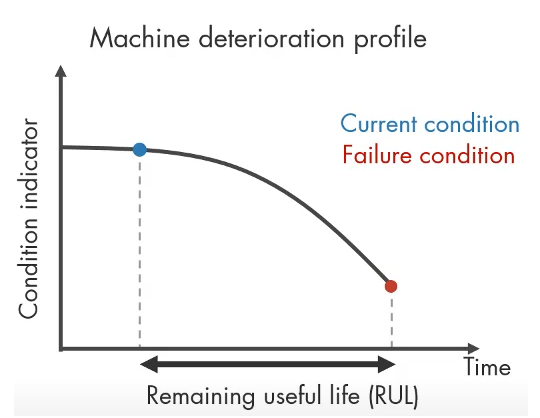
These models are usefull:
- Run-to-failure histories of machines similar to the one you want to diagnose
- A known threshold value of some condition indicator that indicates failure
- Data about how much time or how much usage it took for similar machines to reach failure (lifetime)

## Choose an RUL Estimator
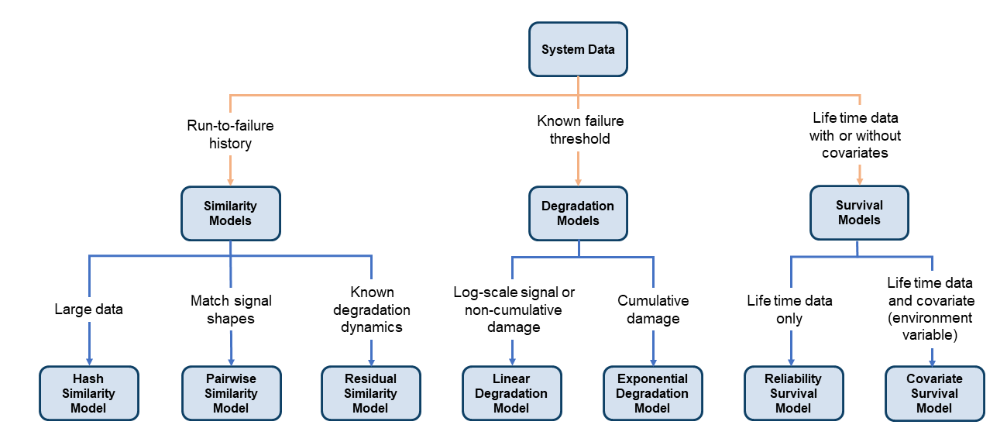

## Similarity Model
Use Similarity model when you have run-to-failure histories from similar machines

Similarity models base the RUL prediction of a test machine on known behaior of similar machines from a historical database. Such models compare a trend in test data or condition-indicator values to the same information extracted from other, similar systems.
Similarity models are useful when:
- Your have run-to-failure data from similar systems (components). Run-to-failure data is data that starts during healthy opreation and ends when the machine is in a state close to failure or maintenance.
- The run-to-failure data shows similar degradation behaviors. That is, the data changes in some characteristic was as the system degrades.

Thus you can use similarty models when you can obtain degradation profiles from your data ensemble. The degradation profiles represent the represent the evolution of one or more condition indicators for each machine in the ensemble (each component), as the machine transitions from a healthy state to a faulty state.

The three models differ in the ways they define and quantify the notion of similarity:
- **Hashed-feature similarity model -** This model is useful when you have large amounts of degradation data, because it reduces the amount of data storage necessary for prediction. However, its accuracy depends on the accuracy of the hash function that the model use

- **Pairwise similarity model -** It computes the distance between different time series, where distance is defined as correlation, dynamic time warping, or a custom metrics that you provide. By taking into account the degradation profile as it changes over time, pariwise similarity estimation can give better results than the hash similarity model.
- **Residual similarity model -** You can view the residual similarity model as a variation on the pairwise similarity model, where the magnitudes of the residuals is the distance metric. The residual similarity approach is useful when your knowledge of the system includes a form for the degradation model.

## Degradation Models
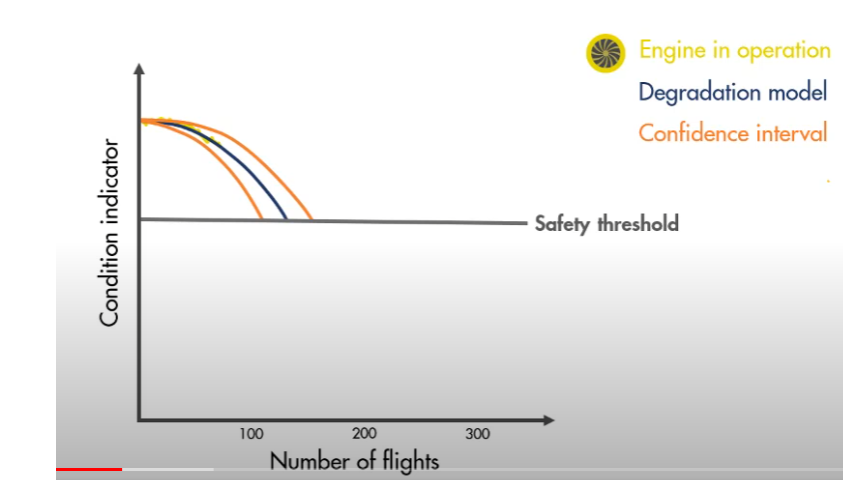
Use Degradation model when you know a threshold of some condition indicator that indicates failure

Degradation models extrapolate past behavior to predict the future conditon. This type of RUL calculation fits a linear or exponential model to degradation profile of a conditon indicator, given the degradation profiles in your ensemble. It then uses the degradation profile of the test comonent to statistically compute the remaining time until the indicator reaches some prescribed threshold. These models are most useful when there is a known value of your condition indicator that indicates failure. The two available degradation model types are:

- **Linear degradation model -** Describes the degradation behavior as a linear stochastic process with an offset term. Linear degradation models are useful when your system does not experience cumulative degradation. 
- **Exponential degradation model -** -Describes the degradation behavior as an exponential stochastic process with an offset term. Exponential degradation models are useful when the test component experiences cumulative degradation. 

## Survival Models
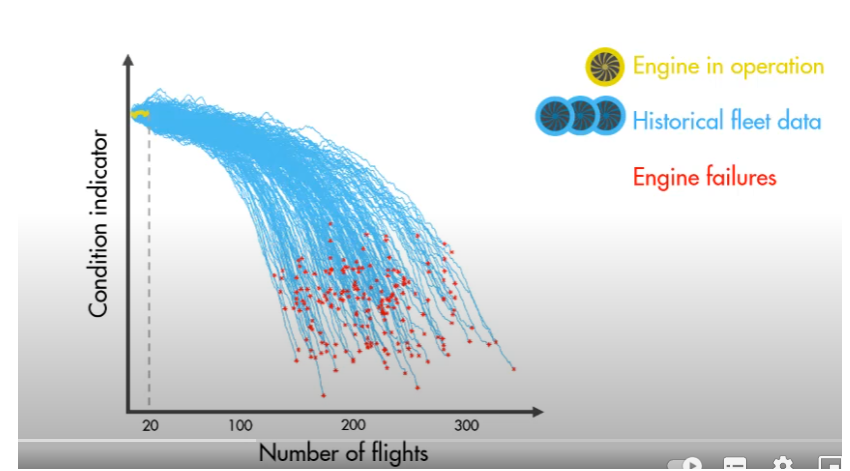
Use survival model when you have failure data from similar machines

Survival analysis a statistical method used to model time-to-event data. It is useful when you do not have complete run-to-failure histories, but instead have:

- Only data about the life span of similar components.
- Both life spans and some other variable data (covariates) that correlates with the RUL

# Remaining Useful Life Estimation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import xgboost as xgb

## Data Preparation

Use pandas to load and convert the data text file to a DataFrame

In [27]:
degradationData = pd.read_csv('train_FD002.txt', sep=' ', header=None,
                  names=['op_setting_1','op_setting_2','op_setting_3',
                        'sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10',
                        'sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21','sensor_22','sensor_23'])

degradationData.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 53759 entries, (1, 1) to (260, 316)
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_setting_1  53759 non-null  float64
 1   op_setting_2  53759 non-null  float64
 2   op_setting_3  53759 non-null  float64
 3   sensor_1      53759 non-null  float64
 4   sensor_2      53759 non-null  float64
 5   sensor_3      53759 non-null  float64
 6   sensor_4      53759 non-null  float64
 7   sensor_5      53759 non-null  float64
 8   sensor_6      53759 non-null  float64
 9   sensor_7      53759 non-null  float64
 10  sensor_8      53759 non-null  float64
 11  sensor_9      53759 non-null  float64
 12  sensor_10     53759 non-null  float64
 13  sensor_11     53759 non-null  float64
 14  sensor_12     53759 non-null  float64
 15  sensor_13     53759 non-null  float64
 16  sensor_14     53759 non-null  float64
 17  sensor_15     53759 non-null  float64
 18  sensor_16     53

Reset index in replace name on data

In [28]:
## train
degradationData.drop(['sensor_22','sensor_23'], axis=1, inplace=True)
degradationData.reset_index(inplace=True)
degradationData.rename(columns={'level_0':'id', 'level_1':'time'}, inplace=True)
degradationData.head()

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0   1     1       34.9983        0.8400         100.0    449.44    555.32   
1   1     2       41.9982        0.8408         100.0    445.00    549.90   
2   1     3       24.9988        0.6218          60.0    462.54    537.31   
3   1     4       42.0077        0.8416         100.0    445.00    549.51   
4   1     5       25.0005        0.6203          60.0    462.54    537.07   

   sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0   1358.61   1137.23      5.48  ...     183.06    2387.72    8048.56   
1   1353.22   1125.78      3.91  ...     130.42    2387.66    8072.30   
2   1256.76   1047.45      7.05  ...     164.22    2028.03    7864.87   
3   1354.03   1126.38      3.91  ...     130.72    2387.61    8068.66   
4   1257.71   1047.93      7.05  ...     164.31    2028.00    7861.23   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0     9.3461       0.02        334       2223     100.00      14.73     8.8071  
1     9.3774       0.02        330       2212     100.00      10.41     6.2665  
2    10.8941       0.02        309       1915      84.93      14.08     8.6723  
3     9.3528       0.02        329       2212     100.00      10.59     6.4701  
4    10.8963       0.02        309       1915      84.93      14.13     8.5286  

[5 rows x 26 columns]

 The training data contains 218 run-to-failure simulations. This group of  measurements is called an "ensemble". 

In [29]:
degradationData.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Split the degradation data into a training data set and a validation data set for later performance evaluation.

In [30]:
trainData = degradationData[degradationData.id <= 175].copy()
validationData = degradationData[degradationData.id > 175].copy()
trainData.shape, validationData.shape

((36608, 26), (17151, 26))

Specify groups of variables of interest.

In [31]:
varNames = degradationData.columns.values
timeVariable = varNames[1]
conditionVariables = varNames[2:5]
dataVariables = varNames[5:]
timeVariable, conditionVariables, dataVariables

('time',
 array(['op_setting_1', 'op_setting_2', 'op_setting_3'], dtype=object),
 array(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
        'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
        'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
        'sensor_21'], dtype=object))

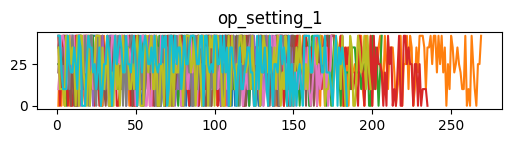

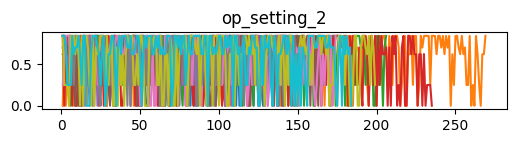

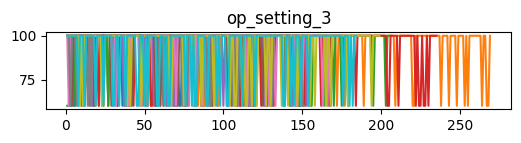

In [32]:
def vis_data(data,list_sensor,nsample):
    '''
    list_sensor: name of columns to visualize
    nsample: number of  ensembles data.
    '''

    start = data.id.unique()[0]
    for x in list_sensor:
        fig = plt.figure(figsize=(6,1))
        plt.title(x)
        
        for i in range(start,start+nsample):
            plt.plot(data[data.id == i].time, data[data.id == i][x])
        plt.show()
    
vis_data(trainData,['op_setting_1','op_setting_2','op_setting_3',],10)

## Working Regime Clustering
There is no clear trend showing the degradation process in each run-to-failure measurement. In this and the next section, the operating conditions will be used to extract clearer degradation trends from sensor signals.
> Notice that each ensemble member contains 3 operating conditions: "op_setting_1", "op_setting_2", and "op_setting_3". First, let's extract the table from each cell and concatenate them into a single table.

In [33]:
opCondition = trainData[conditionVariables] # get operating conditions

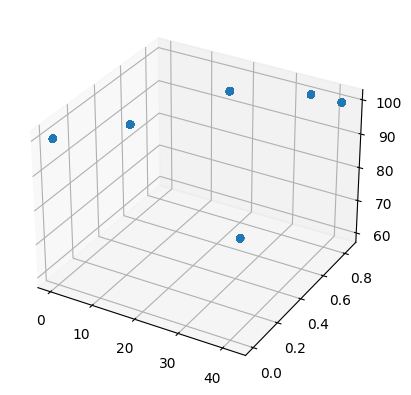

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(opCondition['op_setting_1'],opCondition['op_setting_2'],opCondition['op_setting_3'])
plt.show()

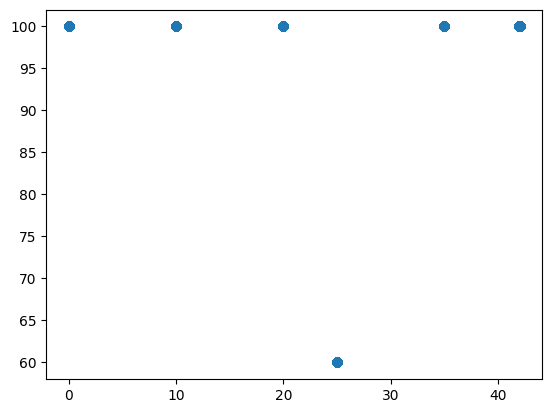

In [35]:
plt.scatter(opCondition['op_setting_1'],opCondition['op_setting_3'])
plt.show()

<Axes: >

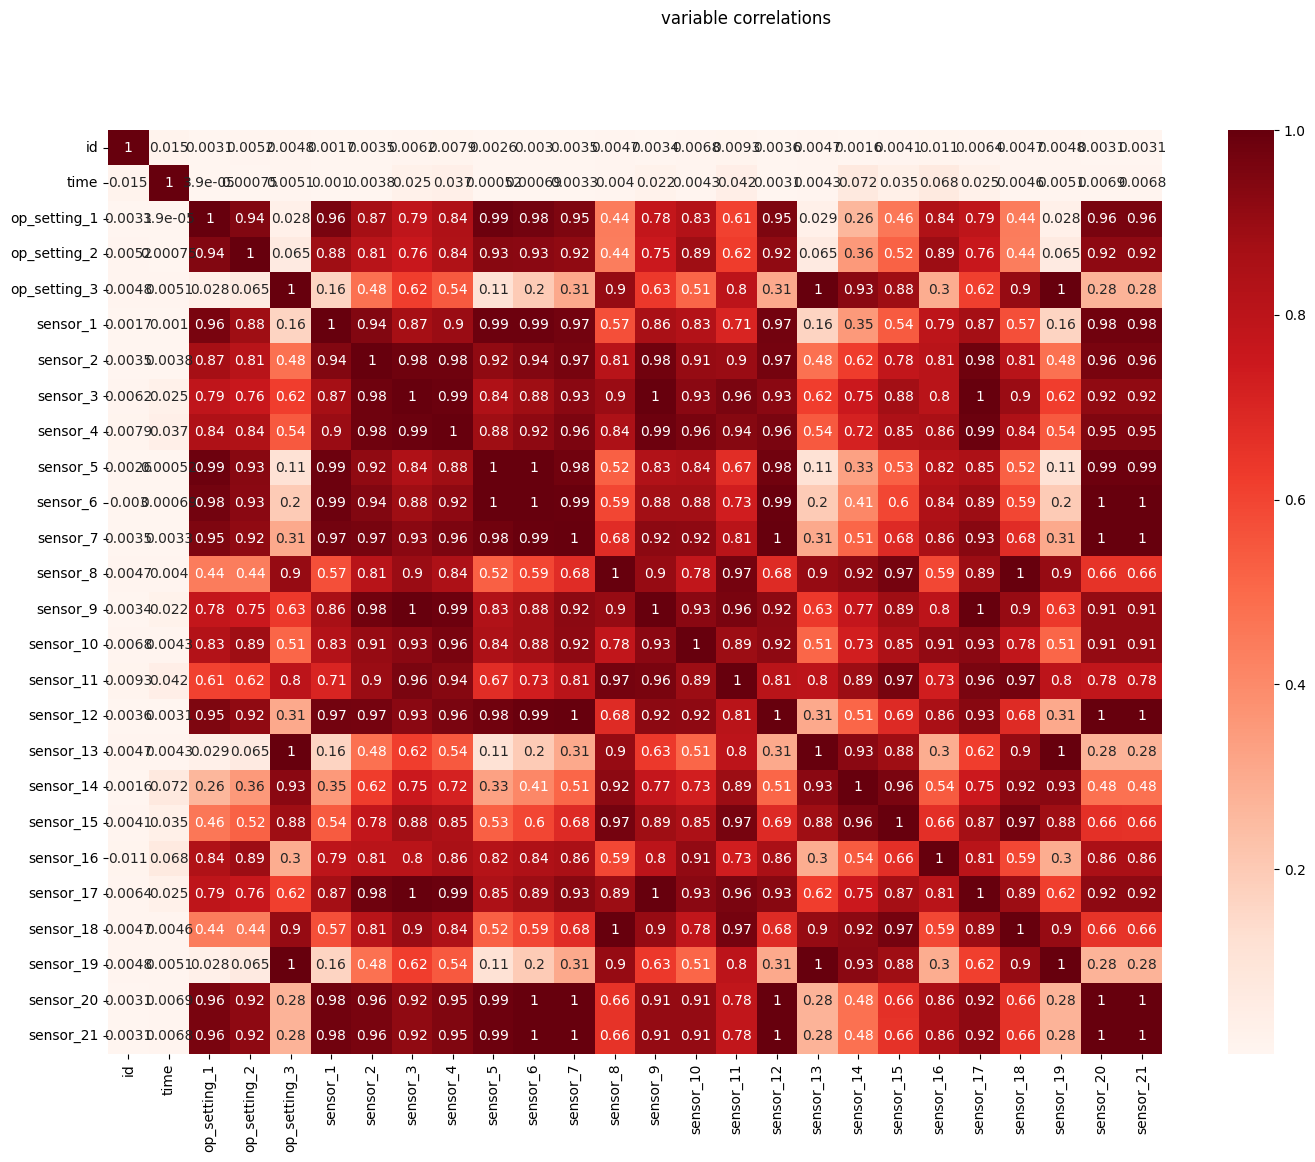

In [36]:
corr = degradationData.corr().abs()
fig, ax = plt.subplots(figsize = (17,12))
fig.suptitle('variable correlations')
sns.heatmap(corr, cmap='Reds', annot=True)

In [37]:
model_kmeans = KMeans(n_clusters=6, random_state = 0)
model_kmeans.fit(opCondition)
y_means = model_kmeans.predict(opCondition)

/Users/thuynguyen/miniconda/envs/jupyter_notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
trainData['cluster'] = y_means
opCondition['cluster'] = y_means

/var/folders/7_/w3bs_ggj11x3s9d5_s01h_lc0000gn/T/ipykernel_14191/75624734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opCondition['cluster'] = y_means


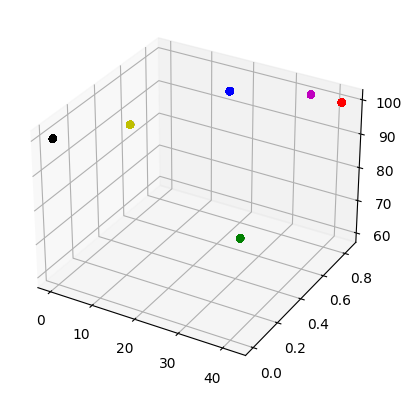

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

opCondition_plt = opCondition[opCondition.cluster == 0].copy()
ax.scatter(opCondition_plt['op_setting_1'],opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='red', label='0')

opCondition_plt = opCondition[opCondition.cluster == 1].copy()
ax.scatter(opCondition_plt['op_setting_1'],opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='blue', label='1')

opCondition_plt = opCondition[opCondition.cluster == 2].copy()
ax.scatter(opCondition_plt['op_setting_1'],opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='green', label='1')

opCondition_plt = opCondition[opCondition.cluster == 3].copy()

ax.scatter(opCondition_plt['op_setting_1'], opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='k', label='1')
opCondition_plt = opCondition[opCondition.cluster == 4].copy()

ax.scatter(opCondition_plt['op_setting_1'], opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='y', label='1')
opCondition_plt = opCondition[opCondition.cluster == 5].copy()
ax.scatter(opCondition_plt['op_setting_1'], opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='m', label='1')

plt.show()

## Working Regime Normalization
group cluster and StandardScaler each cluster

In [40]:
def regimeNormalization(data):
    list_df = []
    Clusters = data.cluster.unique()
    for cluster in Clusters:
        each_cluster = data[data.cluster == cluster].copy()
        sc = StandardScaler()
        each_cluster.loc[:, dataVariables] = sc.fit_transform(each_cluster.loc[:,dataVariables])
        list_df.append(each_cluster)
    res_df = pd.concat(list_df)
    res_df.sort_values(by = ['id','time'], inplace=True)
    return res_df

In [41]:
trainDataNormalized = regimeNormalization(trainData)
trainDataNormalized.head()

/var/folders/7_/w3bs_ggj11x3s9d5_s01h_lc0000gn/T/ipykernel_14191/3994627330.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  each_cluster.loc[:, dataVariables] = sc.fit_transform(each_cluster.loc[:,dataVariables])
/var/folders/7_/w3bs_ggj11x3s9d5_s01h_lc0000gn/T/ipykernel_14191/3994627330.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  each_cluster.loc[:, dataVariables] = sc.fit_transform(each_cluster.loc[:,dataVariables])
/var/folders/7_/w3bs_ggj11x3s9d5_s01h_lc0000gn/T/ipykernel_14191/3994627330.py:7: DeprecationWarning: In a futur

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0   1     1       34.9983        0.8400         100.0       0.0 -1.049946   
1   1     2       41.9982        0.8408         100.0       0.0  0.464414   
2   1     3       24.9988        0.6218          60.0       0.0  1.264393   
3   1     4       42.0077        0.8416         100.0       0.0 -0.427205   
4   1     5       25.0005        0.6203          60.0       0.0  0.593379   

   sensor_3  sensor_4      sensor_5  ...  sensor_13  sensor_14  sensor_15  \
0 -1.398221  0.789186 -8.881784e-16  ...  -1.450350  -1.588766   0.389890   
1 -0.194127 -0.228321  1.776357e-15  ...  -1.274089  -1.091773   0.102630   
2 -1.098780 -0.391473  1.776357e-15  ...  -1.062959  -1.074863  -0.426332   
3 -0.051374 -0.150028  1.776357e-15  ...  -1.432980  -1.319209  -0.543066   
4 -0.919418 -0.321444  1.776357e-15  ...  -1.171634  -1.355113  -0.375318   

      sensor_16  sensor_17  sensor_18     sensor_19  sensor_20  sensor_21  \
0  6.938894e-18  -0.138999        0.0  0.000000e+00  -0.909782  -1.360990   
1  0.000000e+00  -0.730790        0.0  0.000000e+00  -1.639366  -1.331787   
2  3.469447e-18   1.313241        0.0 -1.421085e-14  -1.658612   1.708013   
3  0.000000e+00  -1.437750        0.0  0.000000e+00   0.018773   1.830378   
4  3.469447e-18   1.313241        0.0 -1.421085e-14  -1.210646  -0.474588   

   cluster  
0        5  
1        0  
2        2  
3        0  
4        2  

[5 rows x 27 columns]

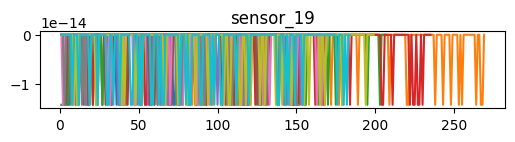

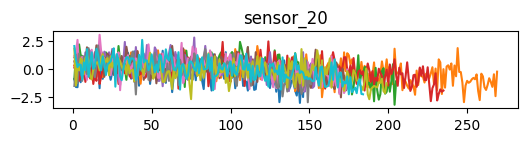

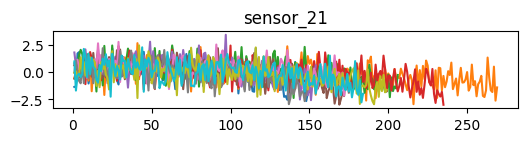

In [48]:
vis_data(trainDataNormalized,dataVariables[18:21],10)

## Trendability Analysis

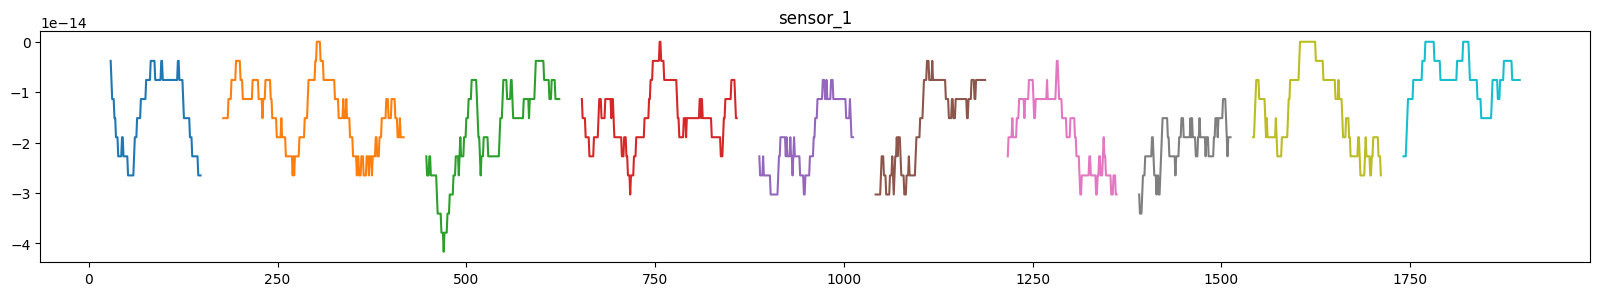

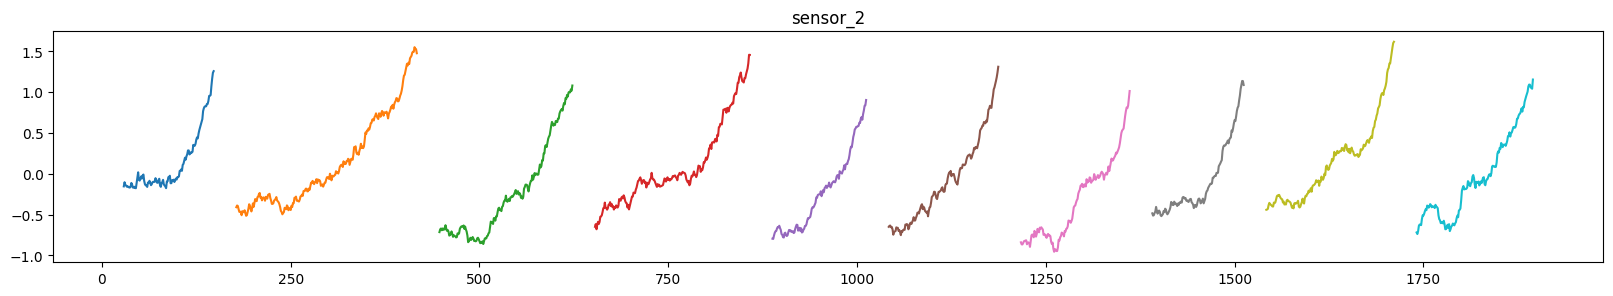

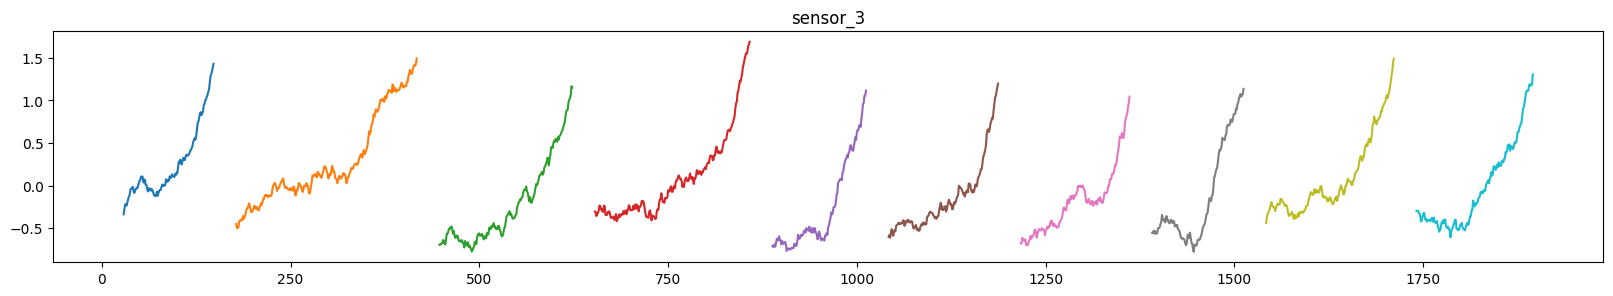

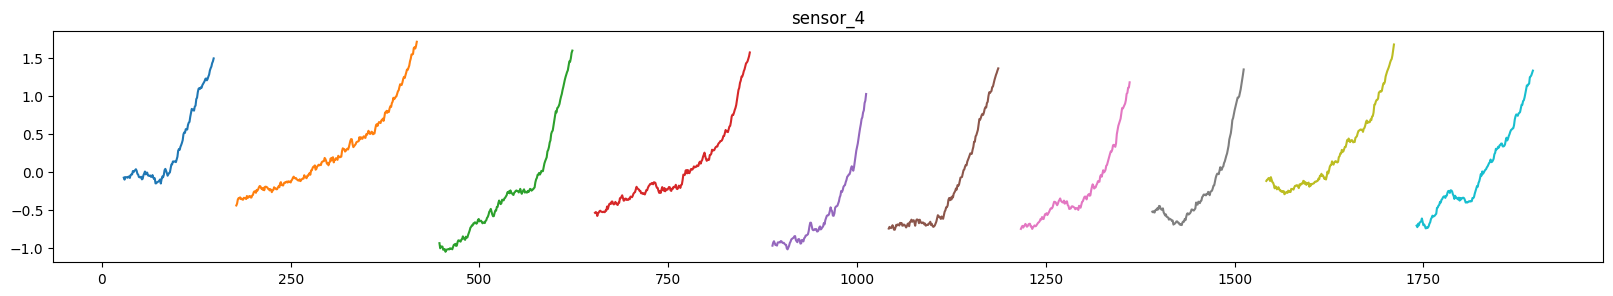

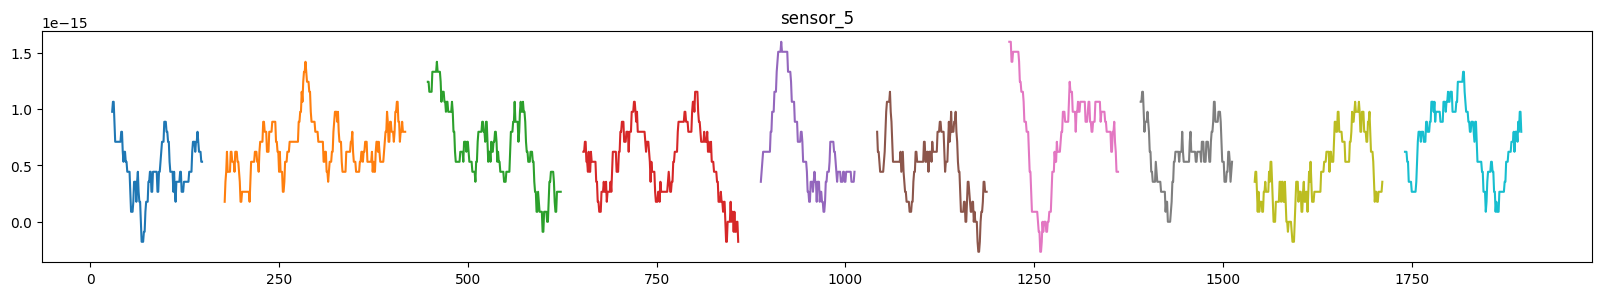

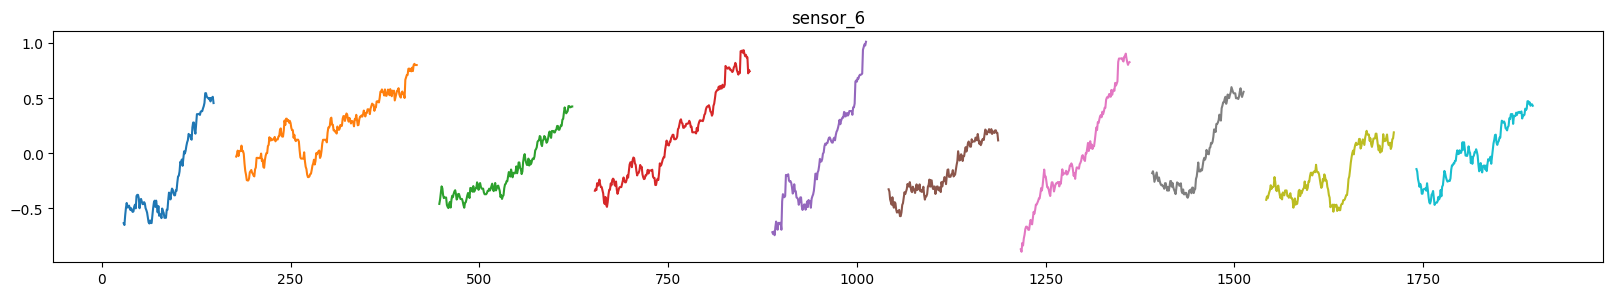

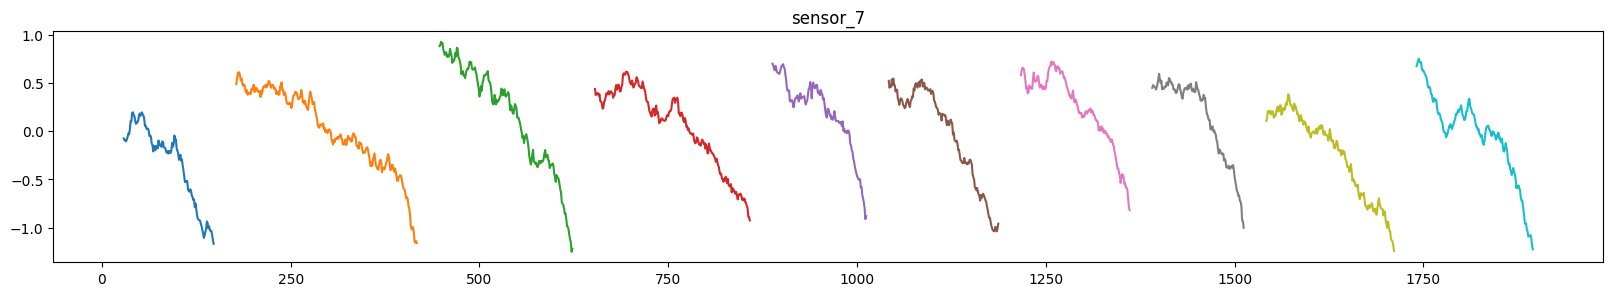

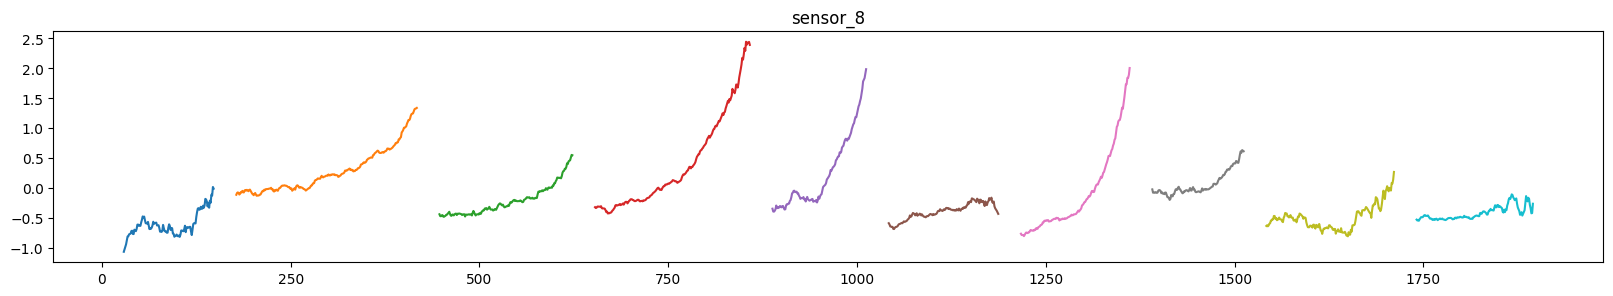

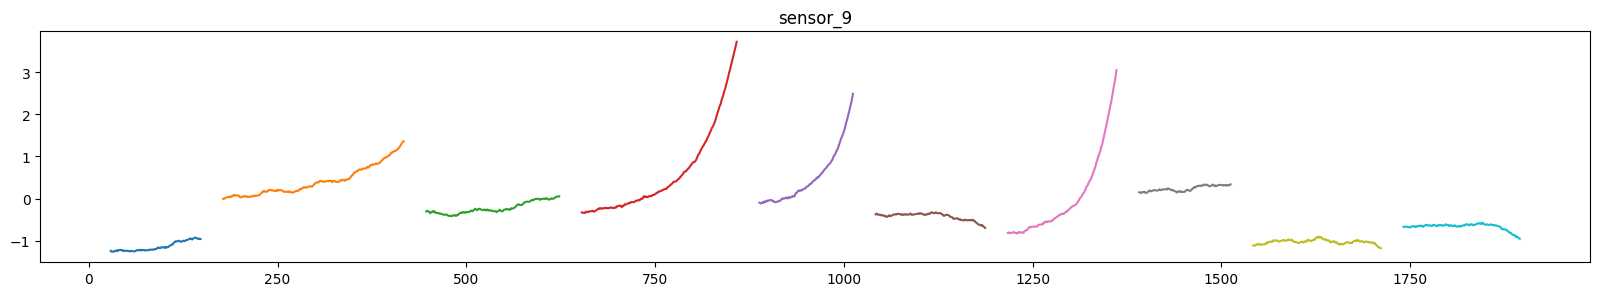

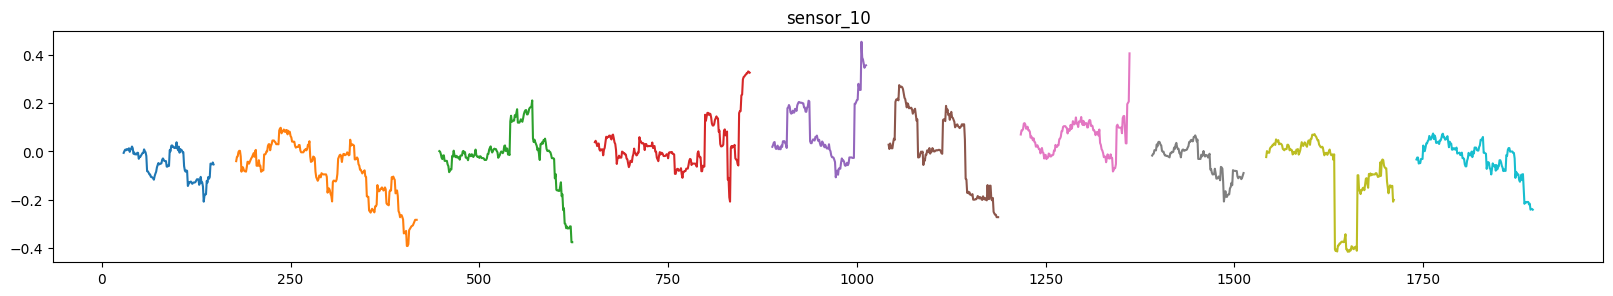

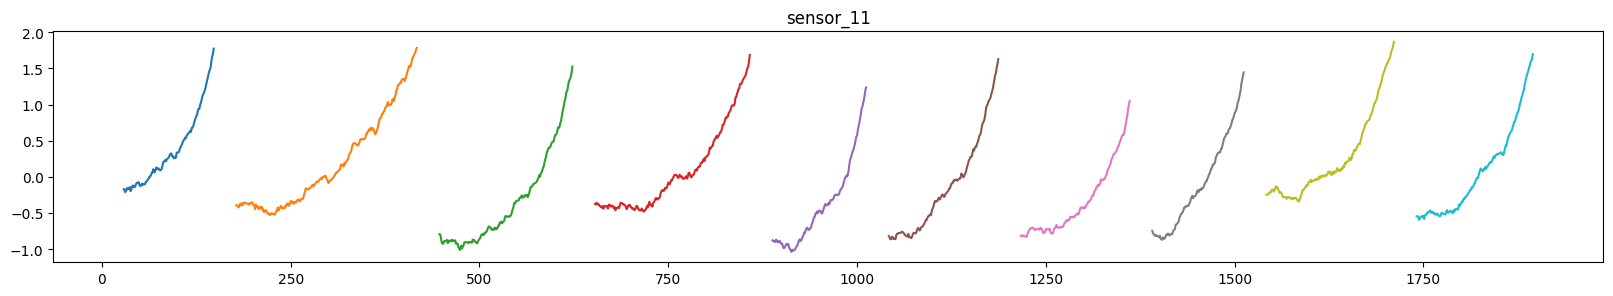

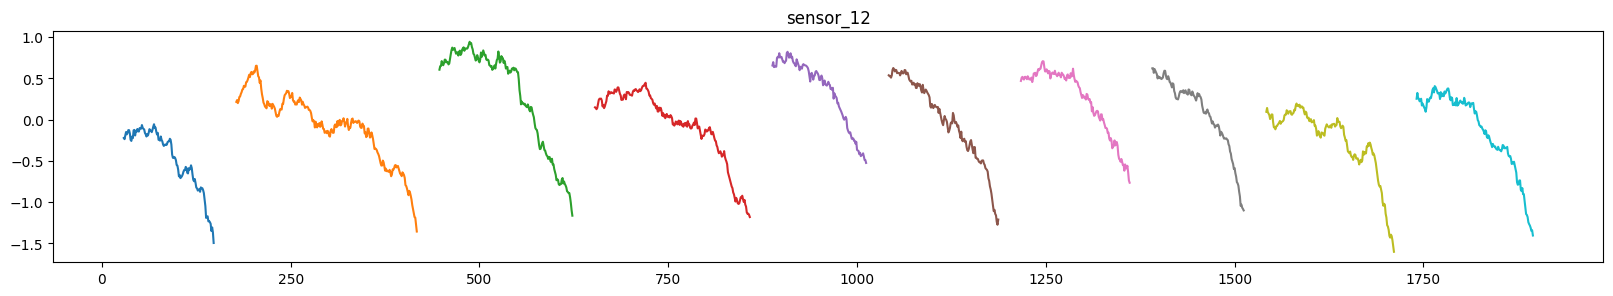

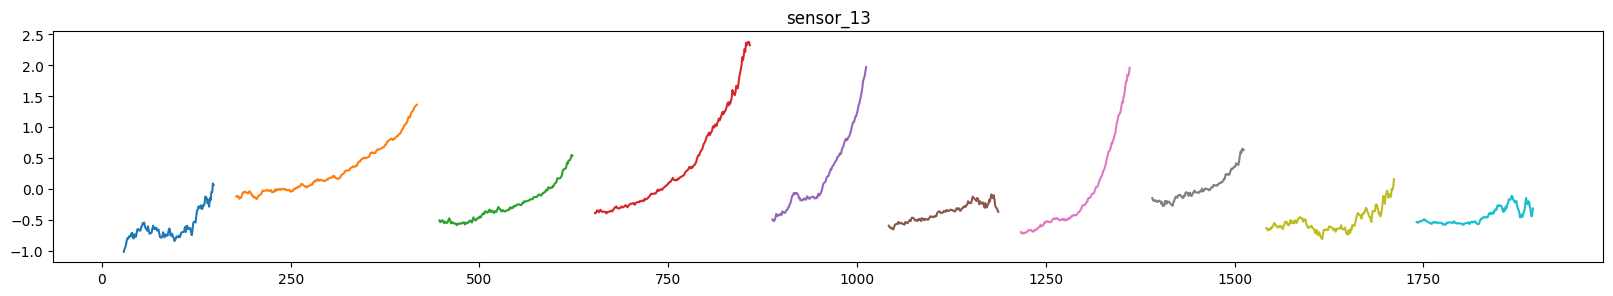

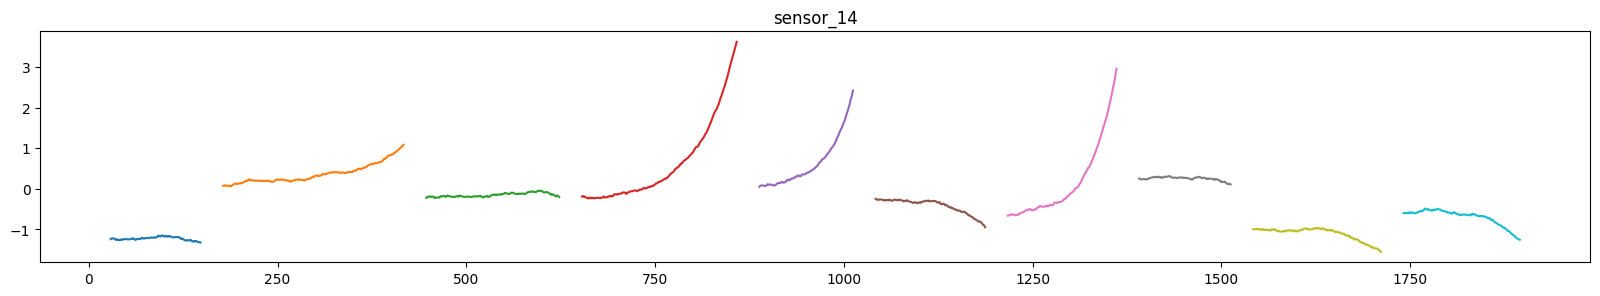

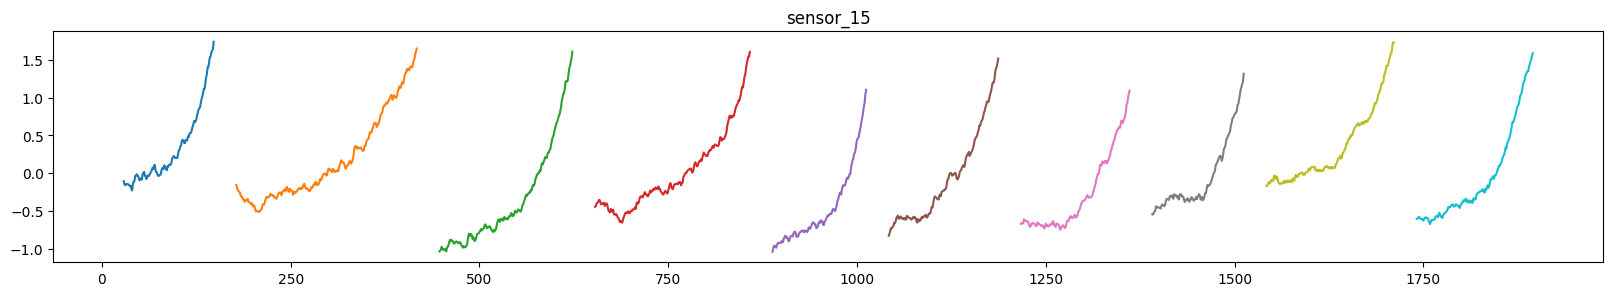

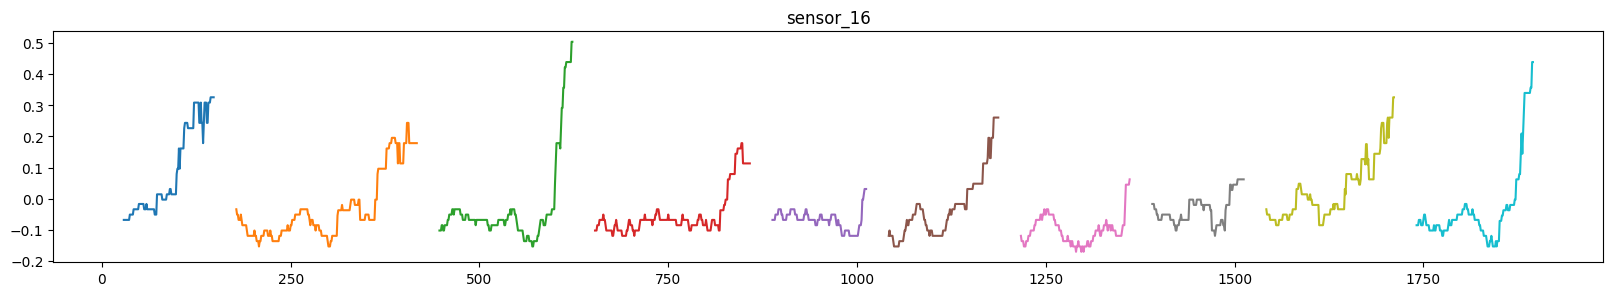

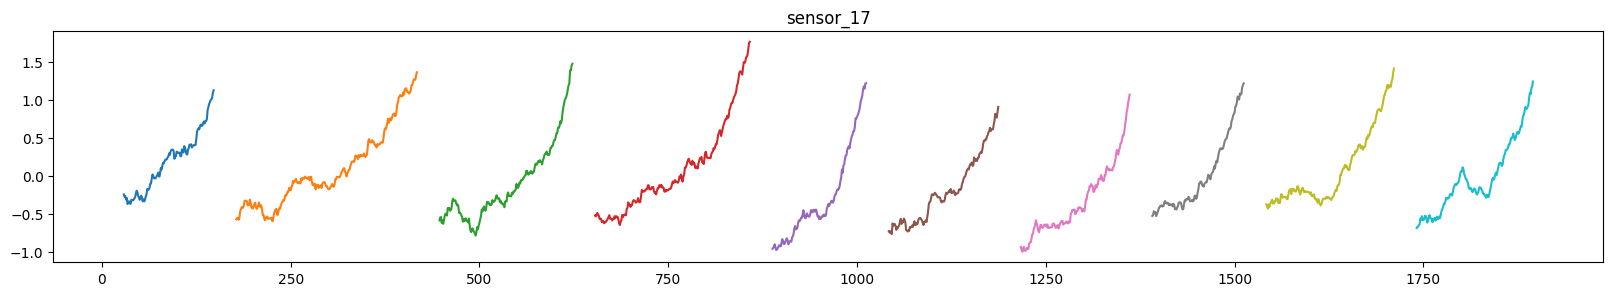

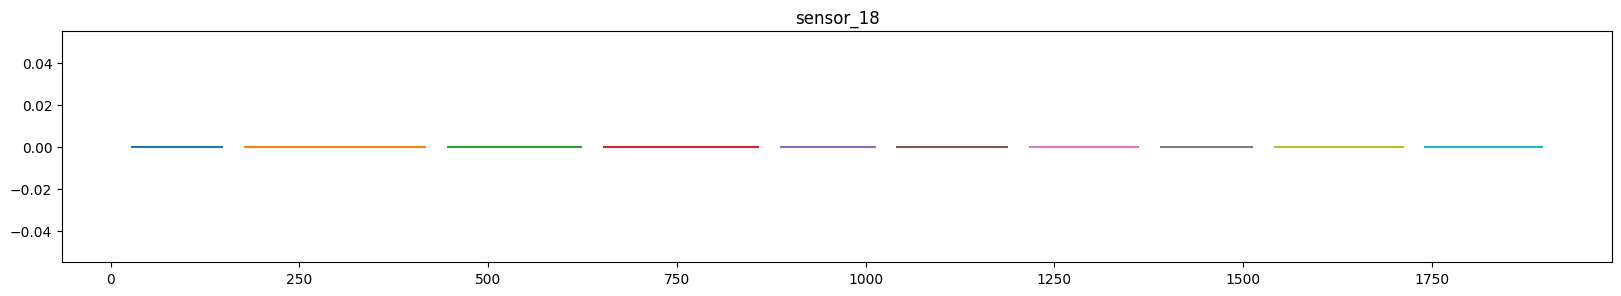

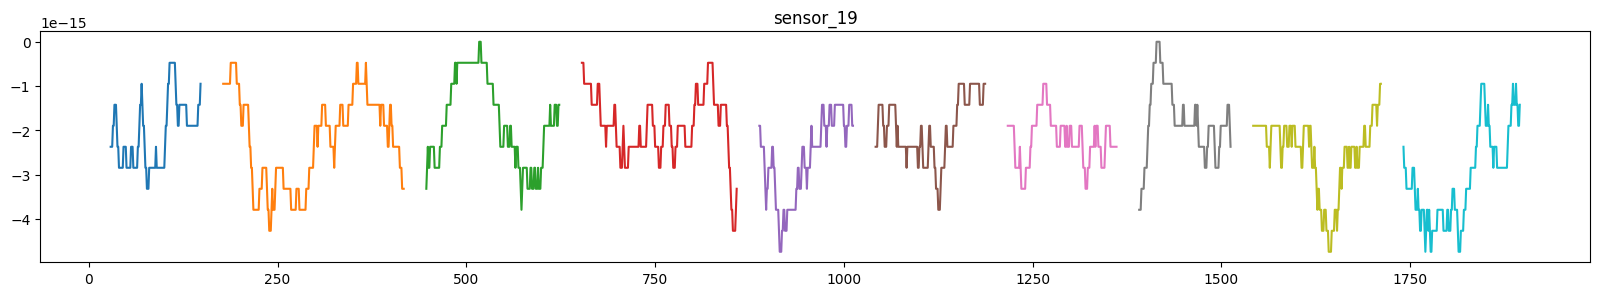

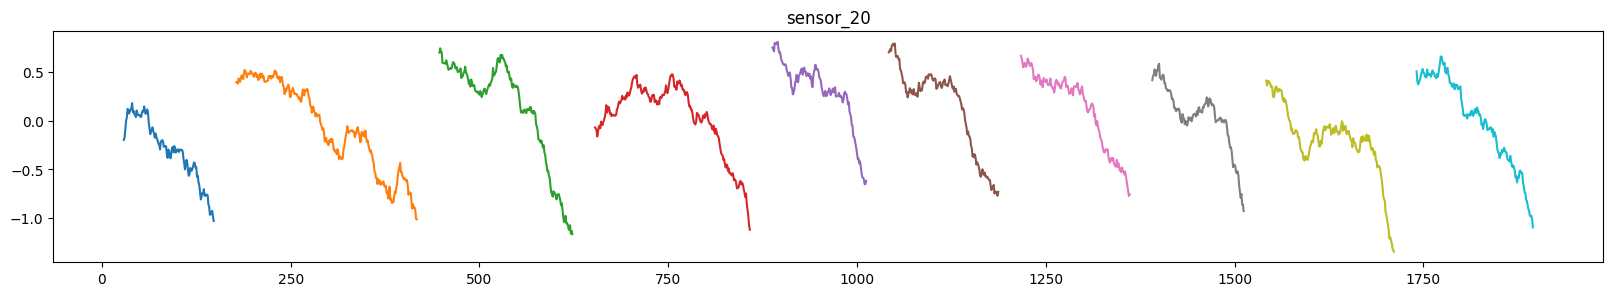

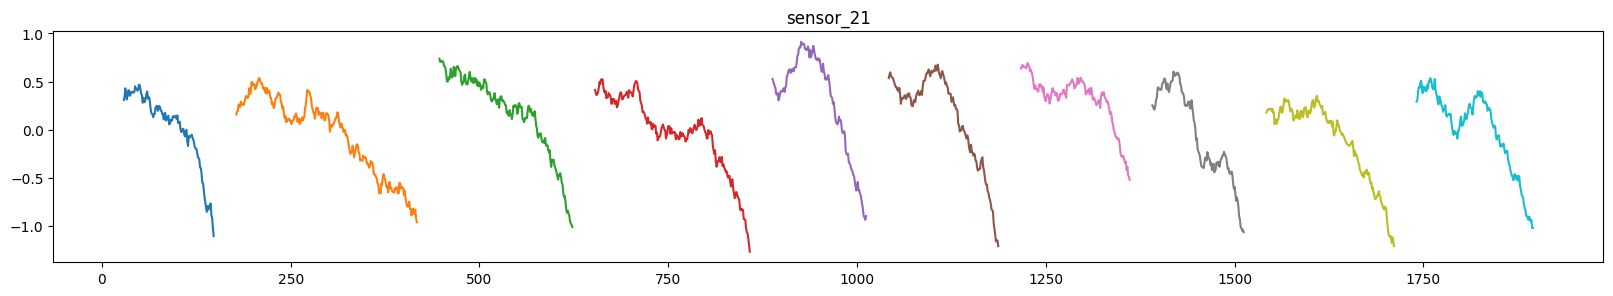

In [57]:
def vis_data_test(data,list_sensor,nsample):
    '''
    list_sensor: name of columns to visualize
    nsample: number of  ensembles data.
    '''
    start = data.id.unique()[0]
    for x in list_sensor:
        fig = plt.figure(figsize=(20,3))
        plt.title(x)
        
        for i in range(start,start+nsample):
            #plt.plot(data[data.id == i].time, data[data.id == i][x])
            df = data[data.id == i].copy()
            df.set_index('time')
            df[x].rolling(window=30).mean().plot()
        plt.show()
vis_data_test(trainDataNormalized,dataVariables,10)

In [58]:
ids = trainDataNormalized.id.unique()
list_df = []
for idx in ids:
    each_idx = trainDataNormalized[trainDataNormalized.id == idx].copy()
    rul = len(each_idx)
    each_idx['health'] = each_idx.apply(lambda x: (1 - (x.time*1.0/rul)) , axis=1)
    list_df.append(each_idx)
trainDataNormalized = pd.concat(list_df)
trainDataNormalized.head()

id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  sensor_2  \
0   1     1       34.9983        0.8400         100.0       0.0 -1.049946   
1   1     2       41.9982        0.8408         100.0       0.0  0.464414   
2   1     3       24.9988        0.6218          60.0       0.0  1.264393   
3   1     4       42.0077        0.8416         100.0       0.0 -0.427205   
4   1     5       25.0005        0.6203          60.0       0.0  0.593379   

   sensor_3  sensor_4      sensor_5  ...  sensor_14  sensor_15     sensor_16  \
0 -1.398221  0.789186 -8.881784e-16  ...  -1.588766   0.389890  6.938894e-18   
1 -0.194127 -0.228321  1.776357e-15  ...  -1.091773   0.102630  0.000000e+00   
2 -1.098780 -0.391473  1.776357e-15  ...  -1.074863  -0.426332  3.469447e-18   
3 -0.051374 -0.150028  1.776357e-15  ...  -1.319209  -0.543066  0.000000e+00   
4 -0.919418 -0.321444  1.776357e-15  ...  -1.355113  -0.375318  3.469447e-18   

   sensor_17  sensor_18     sensor_19  sensor_20  sensor_21  cluster    health  
0  -0.138999        0.0  0.000000e+00  -0.909782  -1.360990        5  0.993289  
1  -0.730790        0.0  0.000000e+00  -1.639366  -1.331787        0  0.986577  
2   1.313241        0.0 -1.421085e-14  -1.658612   1.708013        2  0.979866  
3  -1.437750        0.0  0.000000e+00   0.018773   1.830378        0  0.973154  
4   1.313241        0.0 -1.421085e-14  -1.210646  -0.474588        2  0.966443  

[5 rows x 28 columns]

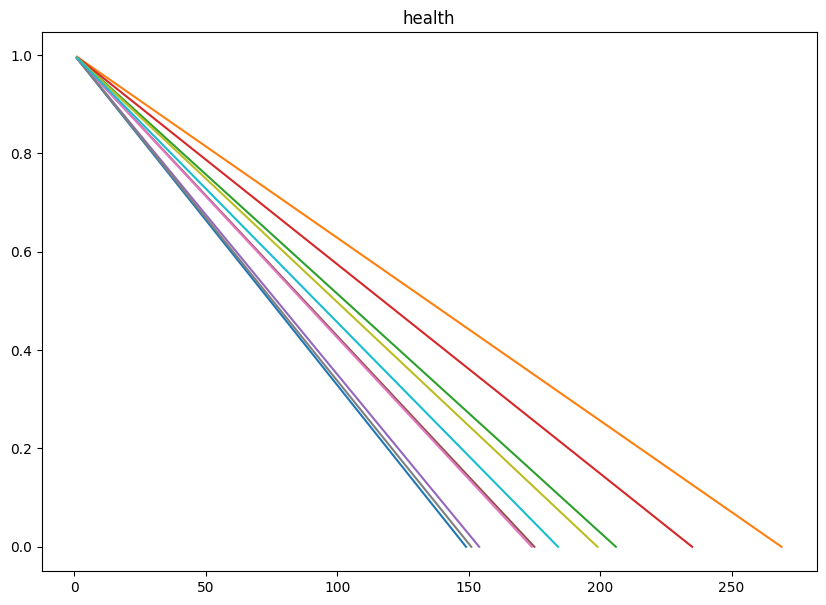

In [59]:
def vis_ensemble(data,list_sensor,nsample):
    start = data.id.unique()[0]
    for x in list_sensor:
        fig = plt.figure(figsize=(10,7))
        plt.title(x)
        for i in range(start,start+nsample):
            plt.plot(data[data.id == i].time, data[data.id == i][x])
        plt.show()
vis_ensemble(trainDataNormalized,['health'],10)

### Test training model with random forest

In [60]:
# create data when choose all columns sensor
sensor_columns =["sensor_"+str(i) for i in range(1,22)]
X_all_sensor = trainDataNormalized[sensor_columns]
y = trainDataNormalized.health

In [61]:
from sklearn import ensemble
model_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
model_rf.fit(X_all_sensor, y)
y_pred = model_rf.predict(X_all_sensor)

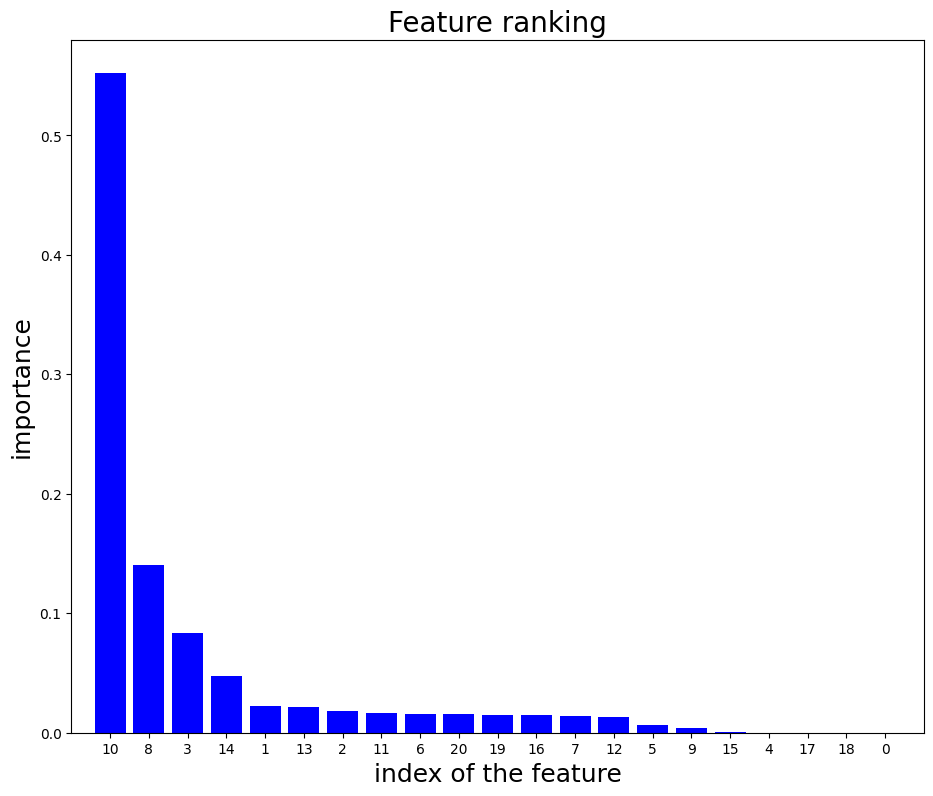

In [62]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = sensor_columns
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X_all_sensor.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_all_sensor.shape[1]), indices) #feature_names, rotation='vertical')
plt.xlim([-1, X_all_sensor.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

In [63]:
X_all_sensor.shape[1]

21

### Turning model xgboost
In grid search, we first define a grid of parameters. Then for each set of parameters, we will fit a 10 xgboost models (as it is 10 fold cross validation). Finally we will average the result of all folds for a particular parameter choice. The parameter choice that gives best score for cross validation is chosen as the best hyperparameter.

Grid search of hyperparameters (with cross validation) is computationally intensive. It might take a long time on a personal computer. If that is the case, readers are advised to comment the next cell and directly use the best hyperparameter values as done in subsequent cells.

In [64]:
dtrain = xgb.DMatrix(X_all_sensor, label = y)

In [65]:
param_grid = [(max_depth, eta) for max_depth in np.arange(2,6) for eta in np.array([0.01, 0.1, 0.3, 0.5, 1])]
num_rounds = 500
min_rmse = np.inf
best_params = None
params = {}
params["objective"] = "reg:squarederror"
for max_depth, eta in param_grid:
    print("max_depth: {}, eta: {}".format(max_depth, eta))
    
    params["max_depth"] = max_depth
    params["eta"] = eta
    
    cv_res = xgb.cv(params, dtrain, num_boost_round= num_rounds, early_stopping_rounds= 10, nfold = 10, seed = 137)
    
    best_rmse_val = cv_res["test-rmse-mean"].min()
    best_num_rounds = cv_res["test-rmse-mean"].argmin() + 1
    
    print("RMSE: {} in {} rounds".format(best_rmse_val, best_num_rounds))
    print()
    
    if best_rmse_val < min_rmse:
        min_rmse = best_rmse_val
        best_params = (max_depth, eta, best_num_rounds)
        
print("Best parameters are: Max_depth= {}, eta= {}, num_rounds = {}. Corresponding RMSE: {}".format(best_params[0],
                                                                                                    best_params[1],
                                                                                                    best_params[2],
                                                                                                    min_rmse))

max_depth: 2, eta: 0.01
RMSE: 0.15768861422086167 in 500 rounds

max_depth: 2, eta: 0.1
RMSE: 0.15117309527111064 in 500 rounds

max_depth: 2, eta: 0.3
RMSE: 0.15143548401677345 in 307 rounds

max_depth: 2, eta: 0.5
RMSE: 0.15168096165170938 in 173 rounds

max_depth: 2, eta: 1.0
RMSE: 0.153926567311056 in 121 rounds

max_depth: 3, eta: 0.01
RMSE: 0.15324213393429562 in 500 rounds

max_depth: 3, eta: 0.1
RMSE: 0.15004984376188246 in 499 rounds

max_depth: 3, eta: 0.3
RMSE: 0.15126996312114932 in 131 rounds

max_depth: 3, eta: 0.5
RMSE: 0.152612539957904 in 68 rounds

max_depth: 3, eta: 1.0
RMSE: 0.15710071729285338 in 35 rounds

max_depth: 4, eta: 0.01
RMSE: 0.15137236651682529 in 500 rounds

max_depth: 4, eta: 0.1
RMSE: 0.14985830808108996 in 239 rounds

max_depth: 4, eta: 0.3
RMSE: 0.15152807976929214 in 69 rounds

max_depth: 4, eta: 0.5
RMSE: 0.1529380935668318 in 38 rounds

max_depth: 4, eta: 1.0
RMSE: 0.15900238207514208 in 16 rounds

max_depth: 5, eta: 0.01
RMSE: 0.150469384896854

We will use the best parameters to train the final regressor. The `num_boost_round` value obtained above is the best value for cross validation. We can take a value that is different from the above number but not very far from it. 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

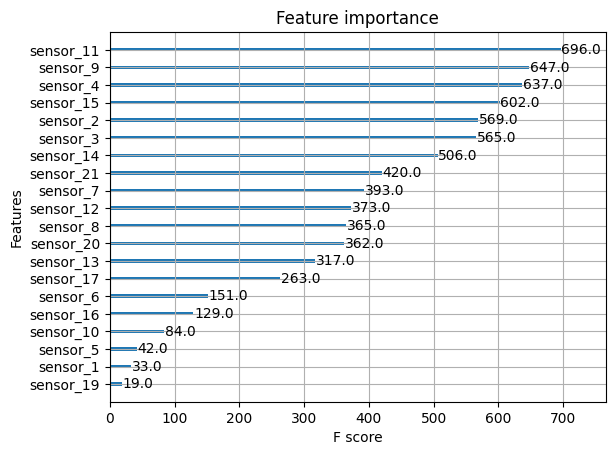

In [66]:
params_tuned = {"max_depth":4, "eta":0.1, "objective":"reg:squarederror"}
bst_tuned = xgb.train(params_tuned, dtrain, num_boost_round= 500)
xgb.plot_importance(bst_tuned)

The health condition of all ensemble members change from 1 to 0 with varying degrading speeds.

Now fit a linear regression model of Health Condition with the most trended sensor measurements as regressors:
Health Condition ~ 1 + sensor2 + sensor3 + sensor4 + sensor9 + sensor11 + sensor14 + sensor15 + sensor21

In [67]:
# Create model went choose columns sensor
#sensorToFuse = ['sensor_2','sensor_3','sensor_4','sensor_9','sensor_11','sensor_14','sensor_15','sensor_21'] // xgboots
sensorToFuse = ['sensor_2','sensor_3','sensor_4','sensor_7','sensor_11','sensor_12','sensor_15','sensor_17'] 
X = trainDataNormalized[sensorToFuse]
y = trainDataNormalized.health
regModel = LinearRegression()
regModel.fit(X,y)
weights = regModel.coef_
weights

array([-0.03144579, -0.02900143, -0.05151199,  0.00572367, -0.06626844,
        0.00568951, -0.04490592, -0.03622847])

Construct a single health indicator by multiplying the sensor measurements with their associated weights .

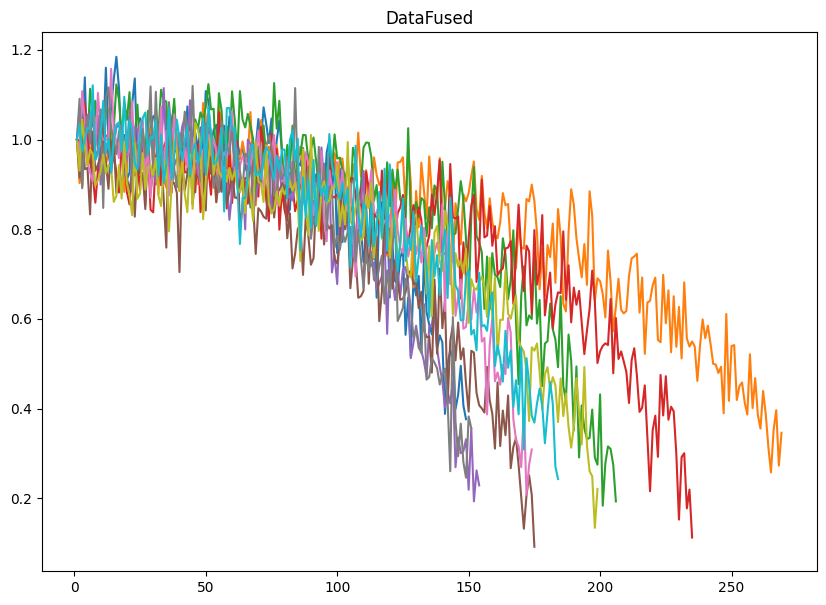

In [68]:
def degradationSensorFusion_notRolling(data, sensorToFuse, weights):
    dataFused = pd.DataFrame(data = np.sum(data[sensorToFuse]*weights, axis=1), columns = ['DataFused'])
    dataFused[['id','time']] = data[['id','time']].copy()
    ids = dataFused.id.unique()
    list_df = []
    for idx in ids:
        each_idx = dataFused[dataFused.id == idx].copy()
        each_idx['DataFused'] = each_idx['DataFused']
        neg = each_idx['DataFused'].values[0]
        each_idx['DataFused'] = each_idx['DataFused'] + 1 - neg
        list_df.append(each_idx)
    res_df = pd.concat(list_df)
    return res_df
trainDataFused = degradationSensorFusion_notRolling(trainDataNormalized, sensorToFuse, weights)
vis_ensemble(trainDataFused,['DataFused'],10)

In [69]:
def degradationSensorFusion(data, sensorToFuse, weights):
    dataFused = pd.DataFrame(data = np.sum(data[sensorToFuse]*weights, axis=1), columns = ['DataFused'])
    dataFused[['id','time']] = data[['id','time']].copy()
    ids = dataFused.id.unique()
    list_df = []
    for idx in ids:
        each_idx = dataFused[dataFused.id == idx].copy()
        each_idx['DataFused'] = each_idx['DataFused'].rolling(window=21, center=True, min_periods=0).mean()
        neg = each_idx['DataFused'].values[0]
        each_idx['DataFused'] = each_idx['DataFused'] + 1 - neg
        list_df.append(each_idx)
    res_df = pd.concat(list_df)
    return res_df
trainDataFused = degradationSensorFusion(trainDataNormalized, sensorToFuse, weights)

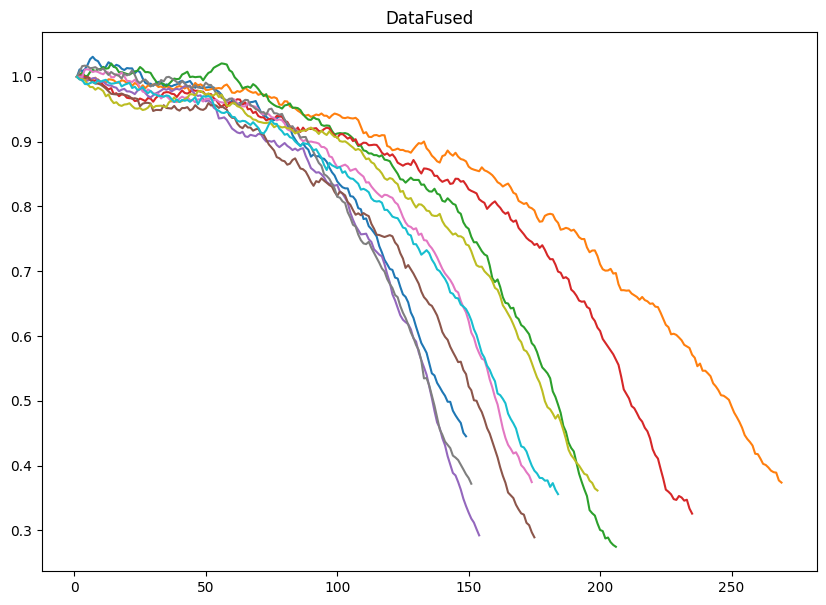

In [70]:
vis_ensemble(trainDataFused,['DataFused'],10)

### Apply same operation to validation data

In [71]:
#Predict columns for validation data
opCondition_var = validationData[conditionVariables]
y_means_var = model_kmeans.predict(opCondition_var)
validationData['cluster'] = y_means_var

In [72]:
validationDataNormalized = regimeNormalization(validationData)
validataionDataToFused = degradationSensorFusion(validationDataNormalized, sensorToFuse, weights)

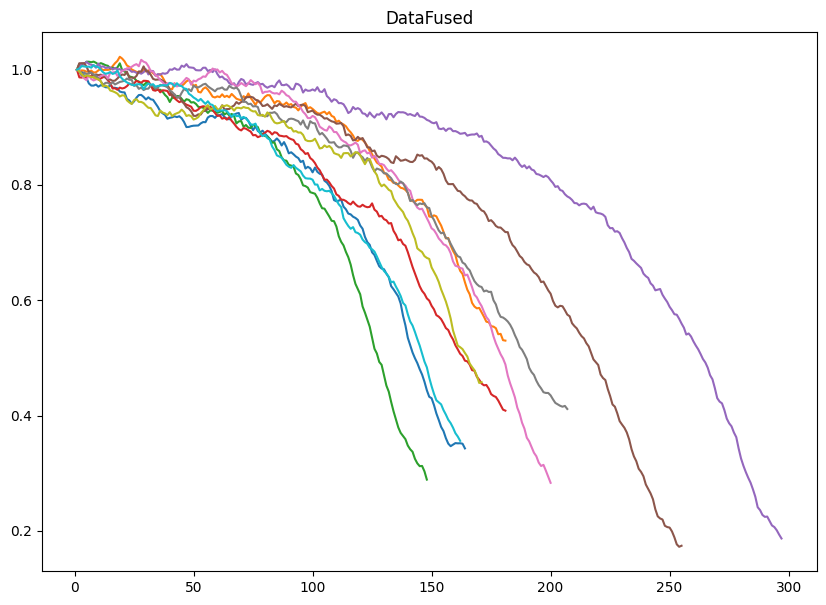

In [73]:
vis_ensemble(validataionDataToFused,['DataFused'],10)

### Build Similarity RUL Model 

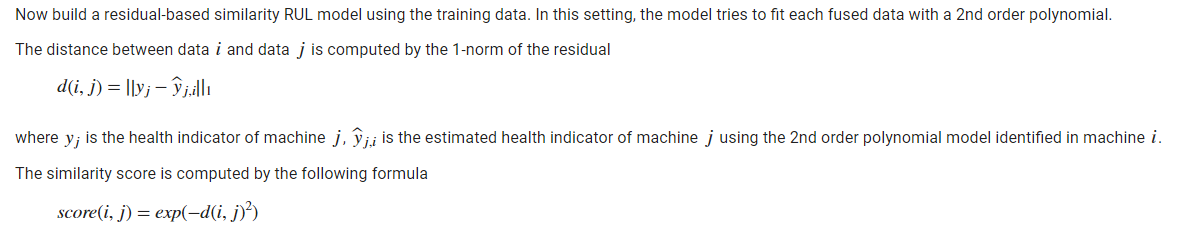


#### Build test model 2nd order polynomial

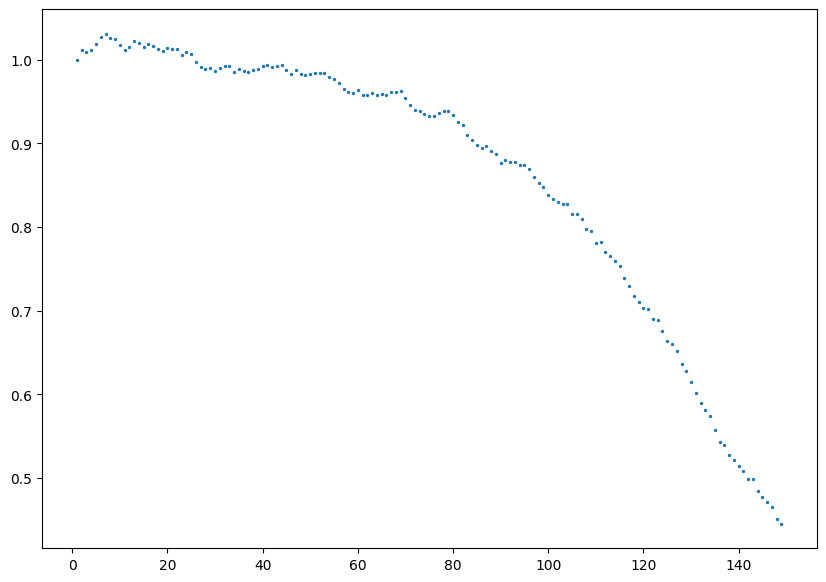

In [74]:
trainDataFused_1 = trainDataFused[trainDataFused.id == 1].copy()
fig = plt.figure(figsize=(10,7))
plt.scatter(trainDataFused_1.time, trainDataFused_1.DataFused, s=2)

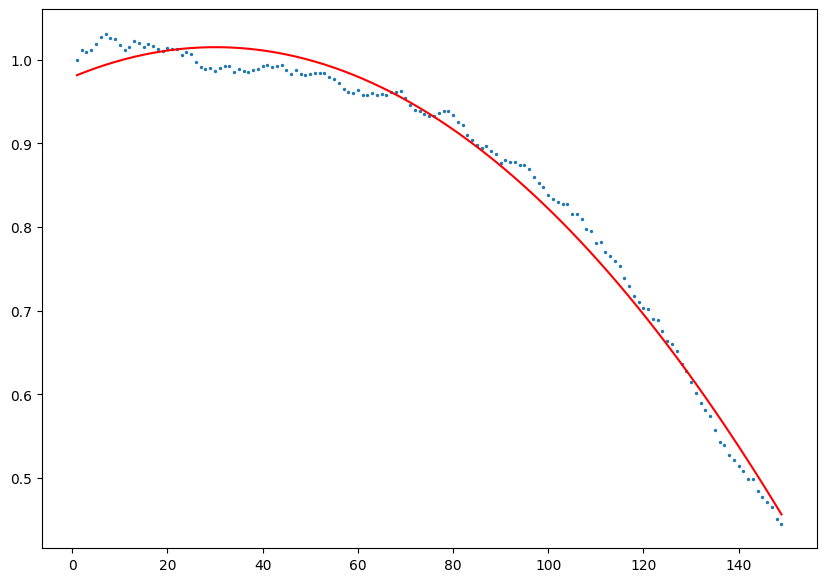

In [75]:
# fit data with a 2nd order polynomial.
p = np.polyfit(trainDataFused_1.time, trainDataFused_1.DataFused, 2)

fig = plt.figure(figsize=(10,7))
plt.scatter(trainDataFused_1.time, trainDataFused_1.DataFused, s=2, label='Train Data')
plt.plot(trainDataFused_1.time,np.polyval(p,trainDataFused_1.time), c='r', label='best fit 2nd polynomial')

### Apply same operation to validation data

In [76]:
class residualSimilarityModel:
    
    def __init__(self):
        self.df_model = pd.DataFrame(columns = ['id','lifeSpan','poly'], index=None)
    
    def fit(self, dataTrain): # data train has many machines
        ids = dataTrain.id.unique()
        for idx in ids:
            each_id = dataTrain[dataTrain.id == idx].copy()
            poly = np.polyfit(each_id.time, each_id.DataFused, 2)
            self.df_model = self.df_model.append(pd.Series({
                'id':idx,
                'lifeSpan':each_id.time.values[-1],
                'poly':poly,
            }), ignore_index = True)
            
    def predictRUL(self, dataTest): # data test is a machine
        list_score = []
        for poly in self.df_model.poly:
            d_ij = np.linalg.norm(dataTest.DataFused - np.polyval(poly, dataTest.time),ord=1)
#            score = np.exp(-d_ij**2)
#             print(score)
            list_score.append(d_ij)
        
        df_pred = self.df_model[['id','lifeSpan']].copy()
        df_pred['score'] = list_score
        df_pred.sort_values(by = 'score',inplace=True)
        df_pred = df_pred[:50]
        
        estRUL = df_pred.lifeSpan.mean() - dataTest.time.max()
        ciRUL = [df_pred.lifeSpan.min(),df_pred.lifeSpan.max()]
        
        return estRUL, ciRUL, df_pred

In [77]:
class residualSimilarityModel_matrix:
    """
    This class is a model estimate of RUL
    
    .fit() training data 
    .predictRUL() to predict an estimate of RUL
    
    """
    def __init__(self):
        
        self.df_model = pd.DataFrame(columns = ['id','lifeSpan','poly'], index=None)
    
    def fit(self, dataTrain): # data train has many machines
        """
        Training data : fit each fused data with a 2nd order polynomial
        Params:
            dataTrain (DataFrane): fused training data
        """
        Ids = dataTrain.id.unique()
        for id in Ids:
            each_id = dataTrain[dataTrain.id == id].copy()
            poly = np.polyfit(each_id.time, each_id.DataFused, 2)
            self.df_model = self.df_model.append(pd.Series({
                'id':id,
                'lifeSpan':each_id.time.values[-1],
                'poly':poly,
            }), ignore_index = True)
            
    def predictRUL(self, dataTest): # data test is a machine
        
        """
        This method use to predict an estimate RUL 
        
        Params: 
            dataTest (DataFrame): a DataTest 
        return:
            estRUL (number) : a number estimate RUL
            ciRUL (list): range life Span min and life Span maxf
            df_pred (data frame)
        """
        df_pred = self.df_model.copy()
        # calculate distance 
        time = dataTest.time.values
        
        ## create a matrix each columns : x^2, x, 1 for  each time in dataTest
        mx_time = np.column_stack((time*time, time, np.ones(len(time)))) # x^2 + x + 1 
        mx_poly = np.column_stack(df_pred['poly'].values)
        
        # score = sum(abs( Y_j - Y'_ji )) 
        ## matrix multiplication to calculate Y'_ji 
        mx_predict = np.dot(mx_time, mx_poly)
        test_DataFused = dataTest.DataFused.values
        
        ## calcutate abs( Y_j - Y'_ji)
        list_score = abs(np.subtract(mx_predict.T, test_DataFused))
        list_score = list_score.sum(axis=1)
        df_pred['score'] = list_score
        
        df_pred.drop(columns=['poly'])
        
        # find top 100 min of similarity score
        df_pred.sort_values(by = 'score',inplace=True)
        df_pred = df_pred[:50]
        estRUL = df_pred.lifeSpan.mean() - dataTest.time.max()
        ciRUL = [df_pred.lifeSpan.min(),df_pred.lifeSpan.max()]
        
        return estRUL, ciRUL, df_pred

#### Test an engine in validation

In [78]:
%%time
model = residualSimilarityModel_matrix()
model.fit(trainDataFused)
test = validataionDataToFused[validataionDataToFused.id == 176].copy()
trueRUL = test.time.max()
test = test[:int(test.time.max()*0.7)]
trueRUL -= test.time.max()
estRUL, ciRUL, df_predict = model.predictRUL(test)
estRUL

CPU times: user 353 ms, sys: 133 ms, total: 486 ms
Wall time: 253 ms


56.06

In [79]:
df_test_pred = df_predict.sort_values(by = 'score', ascending=True)

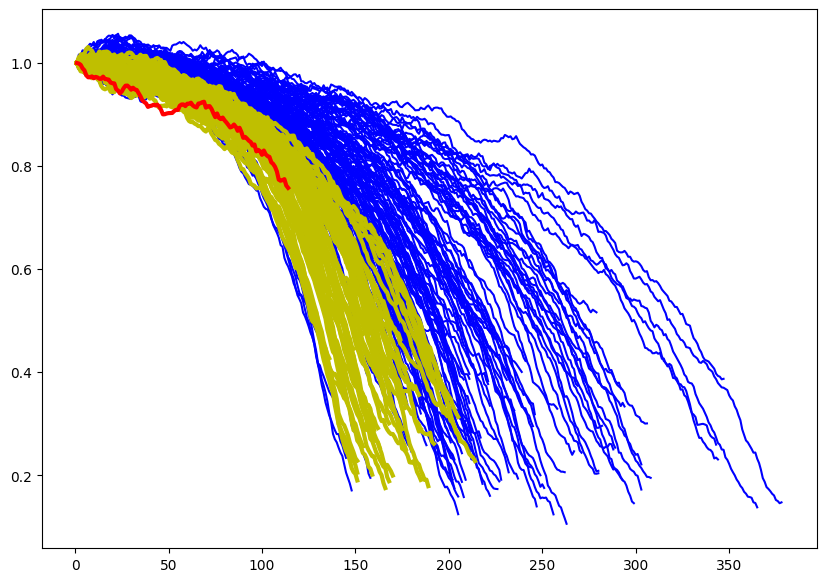

56.06

In [80]:
#visualization of predict model
fig = plt.figure(figsize =(10,7))
ids = trainDataFused.id.unique()
for idx in  ids:
    each_id = trainDataFused[trainDataFused.id == idx].copy()
    plt.plot(each_id.time, each_id.DataFused, c='b')
for idx in df_test_pred.id:
    each_id = trainDataFused[trainDataFused.id == idx].copy()
    plt.plot(each_id.time, each_id.DataFused, c='y',linewidth=3)
plt.plot(test.time,test.DataFused,c='r',linewidth=3)
plt.show()
estRUL

Repeat the same evaluation procedure for the whole validation data set and compute the error between estimated RUL and true RUL for each breakpoint

### Test all validation with break point

In [81]:
%%time
breakpoint = {'err_5': 0.5, 'err_7': 0.7 , 'err_9': 0.9}

error_matrix = pd.DataFrame(columns = ['err_5','err_7','err_9'],index=None)

ids = validataionDataToFused.id.unique()
for idx in ids:
  
    dicIdx = {'err_5': 0, 'err_7': 0 , 'err_9':0}
    for bpIdx in breakpoint.keys():
        
        dataIdx = validataionDataToFused[validataionDataToFused.id == idx].copy()
        trueRUL = dataIdx.time.max()
        dataIdx = dataIdx[:int(dataIdx.time.max() * breakpoint[bpIdx])]
        trueRUL -= dataIdx.time.max()
        estRUL, _, _  = model.predictRUL(dataIdx)
        dicIdx[bpIdx] = estRUL - trueRUL
    error_matrix = error_matrix.append(pd.Series(dicIdx), ignore_index=True)

CPU times: user 432 ms, sys: 62.6 ms, total: 494 ms
Wall time: 408 ms


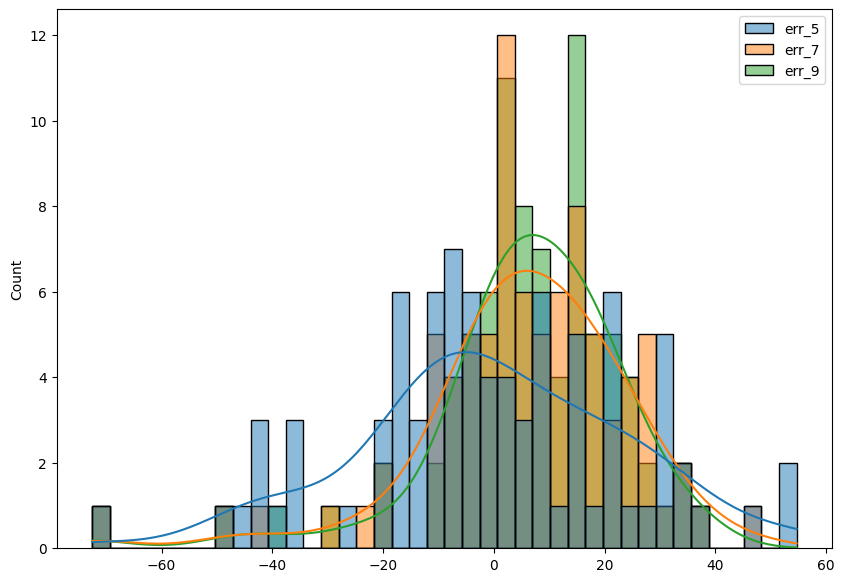

In [82]:
fig = plt.figure(figsize=(10,7))
sns.histplot(error_matrix,kde=True,bins=40)
plt.show()

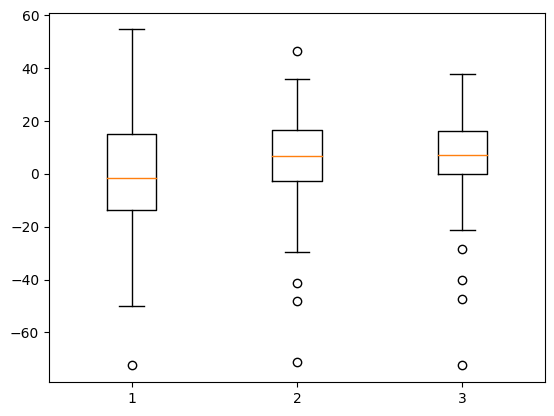

In [83]:
plt.boxplot(error_matrix)
plt.show()

In [84]:
errorMean = error_matrix.mean()
errorMean

err_5   -0.570118
err_7    5.858118
err_9    6.282588
dtype: float64

In [85]:
errorMean = error_matrix.median()
errorMean

err_5   -1.74
err_7    6.76
err_9    7.12
dtype: float64

In [86]:
errorSD = error_matrix.std()
errorSD

err_5    24.116774
err_7    18.260984
err_9    17.135218
dtype: float64

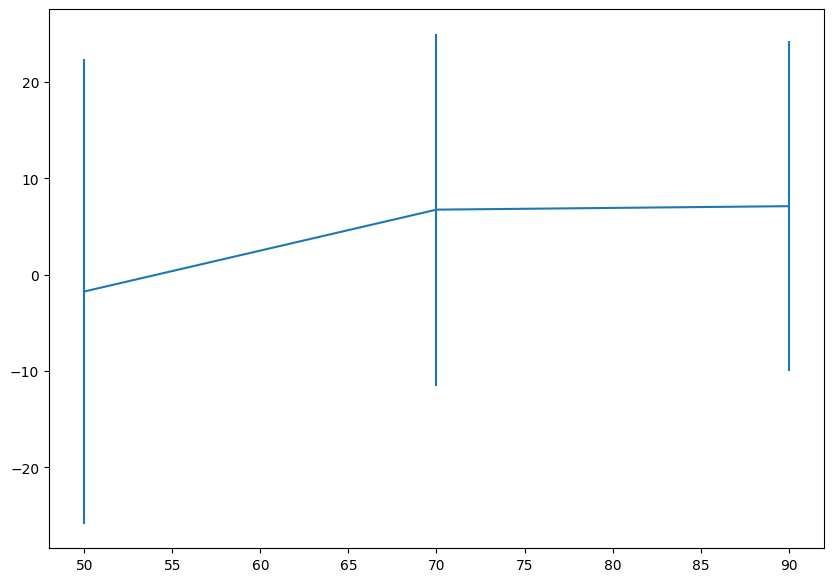

In [87]:
fig = plt.figure(figsize=(10,7))
plt.errorbar(x=[50, 70, 90], y=errorMean, yerr = errorSD)
plt.show()

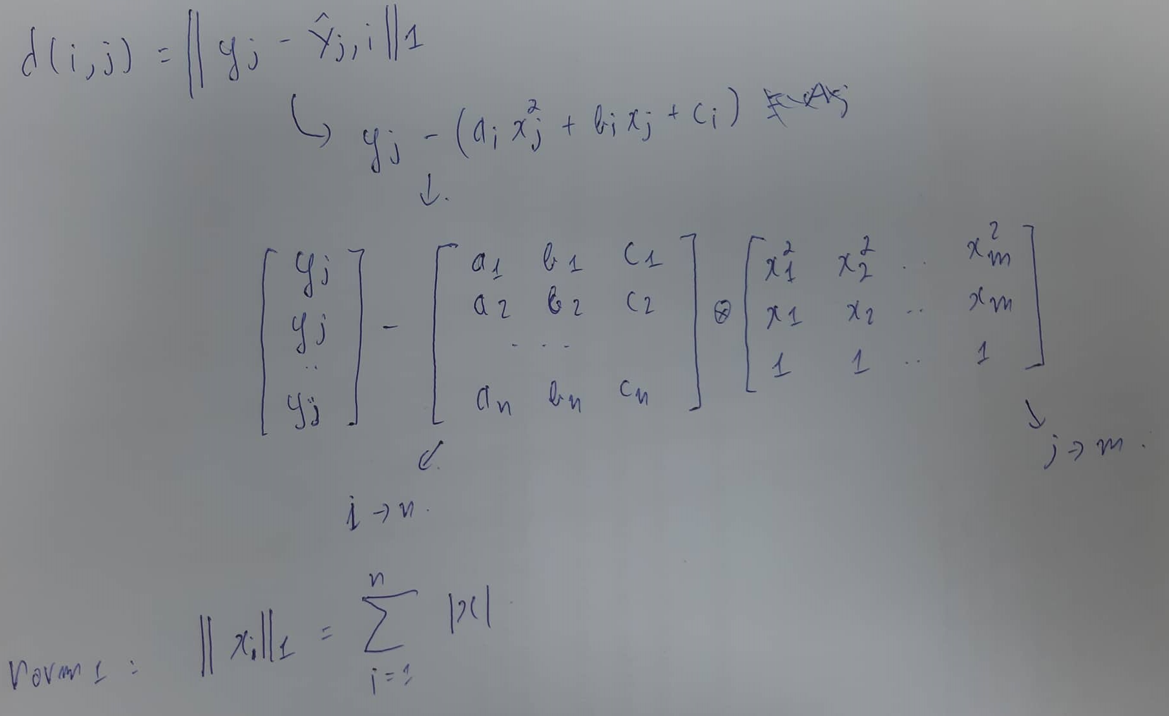